# How is the similarity between Taipei and Kaohsiung?

### Import Libraries

In [33]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import seaborn as sns
import matplotlib.pyplot as plt

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

%matplotlib inline

In [34]:
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: done

# All requested packages already installed.



In [35]:
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values 

Solving environment: done

# All requested packages already installed.



#### Define Foursquare Credentials and Version


In [36]:
CLIENT_ID = 'ILDTQYVR1TFATLHQJZ05KFKHA1FWNHLGMOUKYXWWA0RNLVK0' # Will's Foursquare ID
CLIENT_SECRET = 'GQLSG1OCZHODGDUM2JJ0QGXP5HPDVDAPERHHVDJ4KZV0RO3Y' # Will Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ILDTQYVR1TFATLHQJZ05KFKHA1FWNHLGMOUKYXWWA0RNLVK0
CLIENT_SECRET:GQLSG1OCZHODGDUM2JJ0QGXP5HPDVDAPERHHVDJ4KZV0RO3Y


## Get Taiwan's Overall Latitude and longitude

In [37]:
!wget -q -O 'taiwan_location.csv' https://github.com/willbearlee/capstone/raw/master/taiwan_location.csv

In [129]:
taiwan_location_df = pd.read_csv('taiwan_location.csv')
taiwan_location_df.head()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

     行政區名  _x0033_碼郵遞區號       中心點經度      中心點緯度  \
0  臺北市中正區           100  121.519884  25.032405   
1  臺北市大同區           103  121.513042  25.063424   
2  臺北市中山區           104  121.538160  25.069699   
3  臺北市松山區           105  121.557588  25.059991   
4  臺北市大安區           106  121.543445  25.026770   

                                            TGOS_URL  
0  http://tgos.nat.gov.tw/tgos/Web/MetaData/TGOS_...  
1  http://tgos.nat.gov.tw/tgos/Web/MetaData/TGOS_...  
2  http://tgos.nat.gov.tw/tgos/Web/MetaData/TGOS_...  
3  http://tgos.nat.gov.tw/tgos/Web/MetaData/TGOS_...  
4  http://tgos.nat.gov.tw/tgos/Web/MetaData/TGOS_...  

In [39]:
taiwan_location_df.columns = ['District', 'DistrictNum', 'Longitude', 'Latitude', 'TGOS_URL']
taiwan_location_df = taiwan_location_df.drop(['TGOS_URL', 'DistrictNum'], axis = 1)                         
#taiwan_location_df.head()

### ===========================Get Taipei Overall Information Data Set===========================

In [131]:
!wget -q -O 'taipei_overall.csv' https://github.com/willbearlee/capstone/raw/master/taipei_overall.csv

In [133]:
taipei_overall_df = pd.read_csv('taipei_overall.csv')  
taipei_overall_df.columns = ['District', 'Plate', 'Reg_1', 'Reg_2', 'Reg_3', 'Households', 'Population' , 'Male', 'Female']
taipei_overall_df.head()
taipei_overall_df = taipei_overall_df.drop(taipei_overall_df.index[0])
taipei_overall_df = taipei_overall_df.drop(['Plate', 'Reg_1', 'Reg_2', 'Reg_3'], axis = 1)
taipei_overall_df['District'] = taipei_overall_df['District'].str.replace(' ','')
taipei_overall_df.head()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

  District  Households  Population      Male    Female
1       松山     81217.0    205626.0   96362.0  109264.0
2       信義     89483.0    222814.0  106189.0  116625.0
3       大安    121344.0    308727.0  143896.0  164831.0
4       中山    100450.0    229088.0  106426.0  122662.0
5       中正     65475.0    158814.0   75791.0   83023.0

In [42]:
taipei_overall_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 1 to 15
Data columns (total 5 columns):
District      12 non-null object
Households    12 non-null float64
Population    12 non-null float64
Male          12 non-null float64
Female        12 non-null float64
dtypes: float64(4), object(1)
memory usage: 720.0+ bytes


In [43]:
taipei_overall_df.describe()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

          Households     Population           Male         Female
count      12.000000      12.000000      12.000000      12.000000
mean    88036.583333  222081.916667  105943.916667  116138.000000
std     23579.252704   63298.273163   29567.174051   33818.551563
min     47371.000000  121379.000000   59289.000000   62090.000000
25%     75441.750000  181492.500000   88444.250000   93048.250000
50%     93443.500000  225951.000000  106307.500000  119643.500000
75%    106957.250000  276686.500000  132580.000000  143946.000000
max    121344.000000  308727.000000  143896.000000  164831.000000

In [44]:
taipei_location_df = taiwan_location_df[taiwan_location_df['District'].str.contains('臺北市')]
taipei_location_df['District'] = taipei_location_df['District'].str.replace('臺北市','')
taipei_location_df['District'] = taipei_location_df['District'].str.replace('區','')

taipei_location_df.head()

/home/will/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/will/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


TypeError: __init__() got an unexpected keyword argument 'max_rows'

  District   Longitude   Latitude
0       中正  121.519884  25.032405
1       大同  121.513042  25.063424
2       中山  121.538160  25.069699
3       松山  121.557588  25.059991
4       大安  121.543445  25.026770

#### Merge District and Location Tables

In [45]:
taipei = pd.merge(taipei_overall_df, taipei_location_df, on='District', how='outer')
taipei = taipei.dropna()
taipei['Area'] = 'Taipei'
taipei

TypeError: __init__() got an unexpected keyword argument 'max_rows'

   District  Households  Population      Male    Female   Longitude  \
0        松山     81217.0    205626.0   96362.0  109264.0  121.557588   
1        信義     89483.0    222814.0  106189.0  116625.0  121.571670   
2        大安    121344.0    308727.0  143896.0  164831.0  121.543445   
3        中山    100450.0    229088.0  106426.0  122662.0  121.538160   
4        中正     65475.0    158814.0   75791.0   83023.0  121.519884   
5        大同     51881.0    127559.0   62056.0   65503.0  121.513042   
6        萬華     78764.0    189052.0   92662.0   96390.0  121.497986   
7        文山    106781.0    273605.0  131073.0  142532.0  121.573608   
8        南港     47371.0    121379.0   59289.0   62090.0  121.609757   
9        內湖    108783.0    287331.0  137101.0  150230.0  121.592383   
10       士林    107486.0    285931.0  137743.0  148188.0  121.550847   
11       北投     97404.0    255057.0  122739.0  132318.0  121.517799   

     Latitude    Area  
0   25.059991  Taipei  
1   25.030621  Taipei  
2   

### ===========================Get Kaohsiung Overall Information Data Set===========================

In [46]:
source = requests.get('http://cabu.kcg.gov.tw/Stat/StatRpts/StatRpt1.aspx').text   
soup = BeautifulSoup(source, 'html.parser')

In [127]:
tbody = soup.find('tbody')
District = []
Village = []
Neighborhood = []
Households = []
Population = []
Male = []
Female = []

for index, value in enumerate(tbody.find_all('tr')):
    #print(value.text.strip())
    #print("---------------------------")
    for index, value in enumerate(value.find_all('td')):
        #print(value.text.strip())
        if  (index % 7 == 0):
            District.append(value.text.strip())   
        elif(index % 7 == 1):
            Village.append(value.text.strip())
        elif(index % 7 == 2):
            Neighborhood.append(value.text.strip())
        elif(index % 7 == 3):
            Households.append(value.text.strip())
        elif(index % 7 == 4):
            Population.append(value.text.strip())
        elif(index % 7 == 5):
            Male.append(value.text.strip())
        elif(index % 7 == 6):
            Female.append(value.text.strip())
        else:
            NeighborhoodList.append(value.text.strip())

dataDic = { "District":District, "Village":Village, "Neighborhood": Neighborhood, "Households":Households, "Population":Population, "Male": Male, "Female": Female}
kao_overall_df = pd.DataFrame(dataDic)

kao_overall_df

TypeError: __init__() got an unexpected keyword argument 'max_rows'

   District Village Neighborhood Households Population       Male     Female
0       高雄市     891       17,329  1,101,122  2,773,596  1,371,586  1,402,010
1       鹽埕區      21          228     10,816     24,041     11,924     12,117
2       鼓山區      38          719     58,836    140,251     67,549     72,702
3       左營區      39          710     79,465    197,039     94,560    102,479
4       楠梓區      37          803     72,210    186,184     91,244     94,940
5       三民一      41          650     33,036     78,191     38,609     39,582
6       三民二      45        1,083    104,110    262,410    125,937    136,473
7       新興區      32          453     23,006     51,097     24,515     26,582
8       前金區      20          261     12,727     26,832     12,724     14,108
9       苓雅區      69        1,240     72,344    169,504     81,347     88,157
10      前鎮區      59        1,298     78,762    188,100     92,394     95,706
11      旗津區      13          212     11,116     28,435     14,630     13,805

In [48]:
# Remove the first total information
kao_overall_df = kao_overall_df.drop(kao_overall_df.index[0])

# Get rid of no use columns
kao_overall_df = kao_overall_df.drop(['Village', 'Neighborhood'], axis = 1)

kao_overall_df.head()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

  District Households Population    Male   Female
1      鹽埕區     10,816     24,041  11,924   12,117
2      鼓山區     58,836    140,251  67,549   72,702
3      左營區     79,465    197,039  94,560  102,479
4      楠梓區     72,210    186,184  91,244   94,940
5      三民一     33,036     78,191  38,609   39,582

In [49]:
# Remove the , then to conver to float type
kao_overall_df['District'] = kao_overall_df['District'].str.replace(' ','')
kao_overall_df["Female"] = kao_overall_df['Female'].str.replace(',','')
kao_overall_df["Households"] = kao_overall_df['Households'].str.replace(',','')
kao_overall_df["Male"] = kao_overall_df['Male'].str.replace(',','')
kao_overall_df["Population"] = kao_overall_df['Population'].str.replace(',','')

In [50]:
# to change use .astype() 
kao_overall_df['Female'] = kao_overall_df.Female.astype(float)
kao_overall_df['Male'] = kao_overall_df.Male.astype(float)
kao_overall_df['Households'] = kao_overall_df.Households.astype(float)
kao_overall_df['Population'] = kao_overall_df.Population.astype(float)

In [51]:
kao_overall_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 1 to 40
Data columns (total 5 columns):
District      40 non-null object
Households    40 non-null float64
Population    40 non-null float64
Male          40 non-null float64
Female        40 non-null float64
dtypes: float64(4), object(1)
memory usage: 1.9+ KB


In [52]:
kao_overall_df.describe()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

          Households     Population           Male        Female
count      40.000000      40.000000      40.000000      40.00000
mean    27528.050000   69339.900000   34289.650000   35050.25000
std     28232.712469   69236.597189   33445.296802   35809.55446
min       601.000000    1977.000000     996.000000     981.00000
25%      8758.750000   22838.500000   11407.750000   11430.75000
50%     13699.000000   37086.500000   18966.000000   18120.50000
75%     36963.250000  100962.250000   50479.250000   50483.00000
max    104110.000000  262410.000000  125937.000000  136473.00000

#### Merge two rows which were separated by original data

In [53]:
Female_1 = kao_overall_df[kao_overall_df['District'].str.contains('鳳山一')]['Female'] 
Female_2 = kao_overall_df[kao_overall_df['District'].str.contains('鳳山二')]['Female'] 
Male_1 = kao_overall_df[kao_overall_df['District'].str.contains('鳳山一')]['Male'] 
Male_2 = kao_overall_df[kao_overall_df['District'].str.contains('鳳山二')]['Male'] 
Households_1 = kao_overall_df[kao_overall_df['District'].str.contains('鳳山一')]['Households'] 
Households_2 = kao_overall_df[kao_overall_df['District'].str.contains('鳳山二')]['Households'] 
Population_1 = kao_overall_df[kao_overall_df['District'].str.contains('鳳山一')]['Population'] 
Population_2 = kao_overall_df[kao_overall_df['District'].str.contains('鳳山二')]['Population'] 

kao_overall_df = kao_overall_df.append({'District': '鳳山區',
                      'Female':int(Female_1) + int(Female_2) ,
                      'Households':int(Male_2)  +  int(Male_2) ,
                      'Male':int(Households_1)  +  int(Households_2) ,
                      'Population':int(Population_1) +  int(Population_2) },
                      ignore_index=True
                     )

In [54]:
Female_1 = kao_overall_df[kao_overall_df['District'].str.contains('三民一')]['Female'] 
Female_2 = kao_overall_df[kao_overall_df['District'].str.contains('三民二')]['Female'] 
Male_1 = kao_overall_df[kao_overall_df['District'].str.contains('三民一')]['Male'] 
Male_2 = kao_overall_df[kao_overall_df['District'].str.contains('三民二')]['Male'] 
Households_1 = kao_overall_df[kao_overall_df['District'].str.contains('三民一')]['Households'] 
Households_2 = kao_overall_df[kao_overall_df['District'].str.contains('三民二')]['Households'] 
Population_1 = kao_overall_df[kao_overall_df['District'].str.contains('三民一')]['Population'] 
Population_2 = kao_overall_df[kao_overall_df['District'].str.contains('三民二')]['Population'] 
 

kao_overall_df = kao_overall_df.append({'District': '三民區',
                      'Female':int(Female_1) + int(Female_2) ,
                      'Households':int(Male_2)  +  int(Male_2) ,
                      'Male':int(Households_1)  +  int(Households_2) ,
                      'Population':int(Population_1) +  int(Population_2) },
                      ignore_index=True
                     )

#### Drop the redundant raws

In [55]:
kao_overall_df = kao_overall_df.drop(4)
kao_overall_df = kao_overall_df.drop(5)
kao_overall_df = kao_overall_df.drop(12)
kao_overall_df = kao_overall_df.drop(13)

In [56]:
kao_overall_df.reset_index(drop=True)

TypeError: __init__() got an unexpected keyword argument 'max_rows'

   District  Households  Population      Male    Female
0       鹽埕區     10816.0     24041.0   11924.0   12117.0
1       鼓山區     58836.0    140251.0   67549.0   72702.0
2       左營區     79465.0    197039.0   94560.0  102479.0
3       楠梓區     72210.0    186184.0   91244.0   94940.0
4       新興區     23006.0     51097.0   24515.0   26582.0
5       前金區     12727.0     26832.0   12724.0   14108.0
6       苓雅區     72344.0    169504.0   81347.0   88157.0
7       前鎮區     78762.0    188100.0   92394.0   95706.0
8       旗津區     11116.0     28435.0   14630.0   13805.0
9       小港區     68583.0    157771.0   78259.0   79512.0
10      林園區     26193.0     69846.0   35262.0   34584.0
11      大寮區     42571.0    112462.0   57431.0   55031.0
12      大樹區     13676.0     42349.0   21681.0   20668.0
13      大社區     13168.0     34617.0   17515.0   17102.0
14      仁武區     34454.0     88020.0   44629.0   43391.0
15      鳥松區     18706.0     44639.0   22573.0   22066.0
16      岡山區     35094.0     97129.0   48162.0   

In [57]:
# kao_overall_df.head(40)

#### Start to clear the location data

In [58]:
kaohsiung_location_df = taiwan_location_df[taiwan_location_df['District'].str.contains('高雄市')]
kaohsiung_location_df['District'] = kaohsiung_location_df['District'].str.replace('高雄市','')
kaohsiung_location_df.head()

/home/will/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


TypeError: __init__() got an unexpected keyword argument 'max_rows'

    District   Longitude   Latitude
257      新興區  120.306734  22.629929
258      前金區  120.294422  22.626991
259      苓雅區  120.320910  22.623594
260      鹽埕區  120.284233  22.624246
261      鼓山區  120.274163  22.650195

#### Merge District and Location Tables

In [59]:
kaohsiung = pd.merge(kao_overall_df, kaohsiung_location_df, on='District', how='outer')
kaohsiung['Area'] = 'Kaohsiung'
kaohsiung

TypeError: __init__() got an unexpected keyword argument 'max_rows'

   District  Households  Population      Male    Female   Longitude  \
0       鹽埕區     10816.0     24041.0   11924.0   12117.0  120.284233   
1       鼓山區     58836.0    140251.0   67549.0   72702.0  120.274163   
2       左營區     79465.0    197039.0   94560.0  102479.0  120.295159   
3       楠梓區     72210.0    186184.0   91244.0   94940.0  120.300758   
4       新興區     23006.0     51097.0   24515.0   26582.0  120.306734   
5       前金區     12727.0     26832.0   12724.0   14108.0  120.294422   
6       苓雅區     72344.0    169504.0   81347.0   88157.0  120.320910   
7       前鎮區     78762.0    188100.0   92394.0   95706.0  120.314675   
8       旗津區     11116.0     28435.0   14630.0   13805.0  120.289154   
9       小港區     68583.0    157771.0   78259.0   79512.0  120.359261   
10      林園區     26193.0     69846.0   35262.0   34584.0  120.399052   
11      大寮區     42571.0    112462.0   57431.0   55031.0  120.411147   
12      大樹區     13676.0     42349.0   21681.0   20668.0  120.425407   
13    

#### Merge Taipei and Kaohsiung Tables together

In [60]:
allTable = pd.concat([kaohsiung, taipei])
allTable.reset_index(drop=True)

TypeError: __init__() got an unexpected keyword argument 'max_rows'

   District  Households  Population      Male    Female   Longitude  \
0       鹽埕區     10816.0     24041.0   11924.0   12117.0  120.284233   
1       鼓山區     58836.0    140251.0   67549.0   72702.0  120.274163   
2       左營區     79465.0    197039.0   94560.0  102479.0  120.295159   
3       楠梓區     72210.0    186184.0   91244.0   94940.0  120.300758   
4       新興區     23006.0     51097.0   24515.0   26582.0  120.306734   
5       前金區     12727.0     26832.0   12724.0   14108.0  120.294422   
6       苓雅區     72344.0    169504.0   81347.0   88157.0  120.320910   
7       前鎮區     78762.0    188100.0   92394.0   95706.0  120.314675   
8       旗津區     11116.0     28435.0   14630.0   13805.0  120.289154   
9       小港區     68583.0    157771.0   78259.0   79512.0  120.359261   
10      林園區     26193.0     69846.0   35262.0   34584.0  120.399052   
11      大寮區     42571.0    112462.0   57431.0   55031.0  120.411147   
12      大樹區     13676.0     42349.0   21681.0   20668.0  120.425407   
13    

### Compare the population

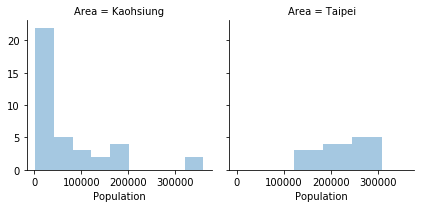

In [61]:
g = sns.FacetGrid(allTable, col = 'Area')
g.map(sns.distplot, 'Population', kde = False)

### Compare the Female


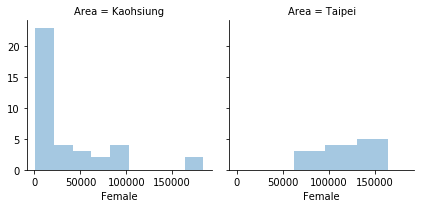

In [62]:
g = sns.FacetGrid(allTable, col = 'Area')
g.map(sns.distplot, 'Female', kde = False)

### Compare the Male

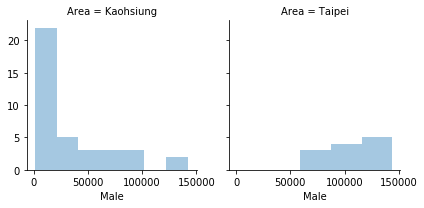

In [63]:
g = sns.FacetGrid(allTable, col = 'Area')
g.map(sns.distplot, 'Male', kde = False)

### Compare the Households

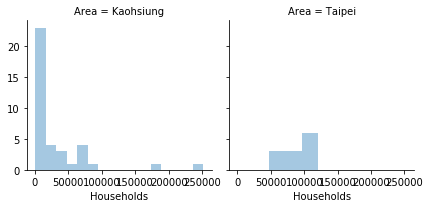

In [64]:
g = sns.FacetGrid(allTable, col = 'Area')
g.map(sns.distplot, 'Households', kde = False)

## Start to retrieve Venues infor of Kaohsiung

#### Get the First's neighborhood's name.First, let's create the GET request URL. Name your URL url.

In [65]:
neighborhood_latitude = kaohsiung.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = kaohsiung.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = kaohsiung.loc[0, 'District'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of 鹽埕區 are 22.62424585, 120.2842331.


#### First, let's create the GET request URL. Name your URL url.

In [101]:
# The correct answer is:
LIMIT = 100 # limit of number of venues returned by Foursquare API


radius = 1500 # define radius


# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=ILDTQYVR1TFATLHQJZ05KFKHA1FWNHLGMOUKYXWWA0RNLVK0&client_secret=GQLSG1OCZHODGDUM2JJ0QGXP5HPDVDAPERHHVDJ4KZV0RO3Y&v=20180605&ll=22.62424585,120.2842331&radius=1500&limit=100'

In [102]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c9da7e2db04f53b19ed8dc7'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Kaohsiung City',
  'headerFullLocation': 'Kaohsiung City',
  'headerLocationGranularity': 'city',
  'totalResults': 85,
  'suggestedBounds': {'ne': {'lat': 22.637745863500015,
    'lng': 120.29883127317244},
   'sw': {'lat': 22.610745836499987, 'lng': 120.26963492682755}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c2f18e5213c2d7fe743305d',
       'name': '樺達奶茶 Huada Milk Tea',
       'location': {'address': '鹽埕區新樂街99號',
        'crossStreet': '總店',
        'lat': 22.62368868890724,
        'lng': 120.28589518018701,
        'labeledLatLngs': [{'label': 'display',


#### From the Foursquare lab in the previous module, we know that all the information is in the items key. Before we proceed, let's borrow the get_category_type function from the Foursquare lab.


In [103]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Now we are ready to clean the json and structure it into a pandas dataframe.¶

#### Let's create a function to repeat the same process to all the neighborhoods in Taipei

In [104]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

                         name            categories        lat         lng
0         樺達奶茶 Huada Milk Tea       Bubble Tea Shop  22.623689  120.285895
1  Pier­2 Art Center (駁二藝術特區)            Public Art  22.620243  120.281792
2                   大ㄎㄡ胖碳烤三明治        Sandwich Place  22.627395  120.283095
3                       高雄婆婆冰        Ice Cream Shop  22.626357  120.282227
4                       港園牛肉麵  Taiwanese Restaurant  22.621107  120.287958

#### And how many venues were returned by Foursquare?

In [105]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))


85 venues were returned by Foursquare.


## Explore Neighborhoods in Kaohsiung

In [106]:
#### Let's create a function to repeat the same process to all the neighborhoods in

In [115]:
def getNearbyVenues(names, latitudes, longitudes, radius=1500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called toronto_fsa.

In [116]:
# type your answer here

kaohsiung_venues = getNearbyVenues(names=kaohsiung['District'],
                                   latitudes=kaohsiung['Latitude'],
                                   longitudes=kaohsiung['Longitude']
                                  )

鹽埕區
鼓山區
左營區
楠梓區
新興區
前金區
苓雅區
前鎮區
旗津區
小港區
林園區
大寮區
大樹區
大社區
仁武區
鳥松區
岡山區
橋頭區
燕巢區
田寮區
阿蓮區
路竹區
湖內區
茄萣區
永安區
彌陀區
梓官區
旗山區
美濃區
六龜區
甲仙區
杉林區
內門區
茂林區
桃源區
那瑪夏區
鳳山區
三民區


#### Let's check the size of the resulting dataframe

In [117]:
print(kaohsiung.shape)
kaohsiung_venues.head()

(38, 8)


TypeError: __init__() got an unexpected keyword argument 'max_rows'

  District  District Latitude  District Longitude                       Venue  \
0      鹽埕區          22.624246          120.284233         樺達奶茶 Huada Milk Tea   
1      鹽埕區          22.624246          120.284233  Pier­2 Art Center (駁二藝術特區)   
2      鹽埕區          22.624246          120.284233                   大ㄎㄡ胖碳烤三明治   
3      鹽埕區          22.624246          120.284233                       高雄婆婆冰   
4      鹽埕區          22.624246          120.284233                       港園牛肉麵   

   Venue Latitude  Venue Longitude        Venue Category  
0       22.623689       120.285895       Bubble Tea Shop  
1       22.620243       120.281792            Public Art  
2       22.627395       120.283095        Sandwich Place  
3       22.626357       120.282227        Ice Cream Shop  
4       22.621107       120.287958  Taiwanese Restaurant  

In [118]:
#### Let's check how many venues were returned for each neighborhood

In [119]:
kaohsiung_venues.groupby('District').count()


TypeError: __init__() got an unexpected keyword argument 'max_rows'

          District Latitude  District Longitude  Venue  Venue Latitude  \
District                                                                 
三民區                      25                  25     25              25   
仁武區                       5                   5      5               5   
六龜區                       4                   4      4               4   
前金區                     100                 100    100             100   
前鎮區                      24                  24     24              24   
大寮區                       4                   4      4               4   
大樹區                       1                   1      1               1   
大社區                       7                   7      7               7   
小港區                       3                   3      3               3   
岡山區                       4                   4      4               4   
左營區                      25                  25     25              25   
彌陀區                       5           

#### Let's find out how many unique categories can be curated from all the returned venues

In [120]:
print('There are {} uniques categories.'.format(len(kaohsiung_venues['Venue Category'].unique())))


There are 115 uniques categories.


In [121]:
kaohsiung_venues['Area'] = 'Kaohsiung'

#### Analyze Each Neighborhood


## Start to retrieve Venues infor of Taipei

In [122]:
taipei_venues = getNearbyVenues(names=taipei['District'],
                                   latitudes=taipei['Latitude'],
                                   longitudes=taipei['Longitude']
                                  )

松山
信義
大安
中山
中正
大同
萬華
文山
南港
內湖
士林
北投


In [123]:
taipei_venues['Area'] = 'Taipei'
taipei_venues

TypeError: __init__() got an unexpected keyword argument 'max_rows'

    District  District Latitude  District Longitude  \
0         松山          25.059991          121.557588   
1         松山          25.059991          121.557588   
2         松山          25.059991          121.557588   
3         松山          25.059991          121.557588   
4         松山          25.059991          121.557588   
5         松山          25.059991          121.557588   
6         松山          25.059991          121.557588   
7         松山          25.059991          121.557588   
8         松山          25.059991          121.557588   
9         松山          25.059991          121.557588   
10        松山          25.059991          121.557588   
11        松山          25.059991          121.557588   
12        松山          25.059991          121.557588   
13        松山          25.059991          121.557588   
14        松山          25.059991          121.557588   
15        松山          25.059991          121.557588   
16        松山          25.059991          121.557588   
17        

#### Let's check how many venues were returned for each neighborhood

In [124]:
print('There are {} uniques categories.'.format(len(taipei_venues['Venue Category'].unique())))


There are 153 uniques categories.


In [125]:
allTable_venues = pd.concat([kaohsiung_venues, taipei_venues])
allTable_venues.head()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

  District  District Latitude  District Longitude                       Venue  \
0      鹽埕區          22.624246          120.284233         樺達奶茶 Huada Milk Tea   
1      鹽埕區          22.624246          120.284233  Pier­2 Art Center (駁二藝術特區)   
2      鹽埕區          22.624246          120.284233                   大ㄎㄡ胖碳烤三明治   
3      鹽埕區          22.624246          120.284233                       高雄婆婆冰   
4      鹽埕區          22.624246          120.284233                       港園牛肉麵   

   Venue Latitude  Venue Longitude        Venue Category       Area  
0       22.623689       120.285895       Bubble Tea Shop  Kaohsiung  
1       22.620243       120.281792            Public Art  Kaohsiung  
2       22.627395       120.283095        Sandwich Place  Kaohsiung  
3       22.626357       120.282227        Ice Cream Shop  Kaohsiung  
4       22.621107       120.287958  Taiwanese Restaurant  Kaohsiung  

In [126]:
pd.crosstab(allTable_venues['Venue Category'],allTable_venues['Area']).T.style.background_gradient(cmap='summer_r')

Venue Category,Airport,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,BBQ Joint,Badminton Court,Bagel Shop,Bakery,Bar,Baseball Field,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Bike Rental / Bike Share,Bistro,Bookstore,Border Crossing,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Buddhist Temple,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Cable Car,Cafeteria,Café,Cantonese Restaurant,Cha Chaan Teng,Chinese Breakfast Place,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cultural Center,Cupcake Shop,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Donut Shop,Dumpling Restaurant,Electronics Store,Exhibit,Farmers Market,Fast Food Restaurant,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gastropub,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Historic Site,History Museum,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hot Spring,Hotel,Hotel Bar,Hotpot Restaurant,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Light Rail Station,Lounge,Malay Restaurant,Market,Massage Studio,Metro Station,Mexican Restaurant,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Night Market,Nightclub,Noodle House,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Pizza Place,Playground,Plaza,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Resort,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soup Place,Southern / Soul Food Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tea Room,Temple,Thai Restaurant,Theater,Theme Park Ride / Attraction,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Shop,Xinjiang Restaurant,Zhejiang Restaurant,Zoo,Zoo Exhibit
Area,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Kaohsiung,0,5,2,0,0,4,17,0,0,1,0,5,1,2,1,1,3,0,1,1,9,1,1,10,1,6,0,1,0,6,2,1,0,0,23,0,0,4,19,4,2,29,0,0,26,0,0,9,0,8,4,2,1,1,2,4,0,1,17,0,0,1,1,0,3,3,1,1,0,0,0,0,4,0,0,0,3,1,4,1,0,0,3,0,39,0,3,0,9,1,3,0,11,3,1,1,0,2,3,0,0,4,0,0,1,0,8,4,1,0,3,0,0,4,1,4,0,1,1,0,9,0,11,0,6,0,1,2,0,1,0,0,0,2,1,0,1,0,2,2,0,0,2,3,0,3,1,1,7,0,0,2,4,1,1,0,2,1,0,0,2,0,3,3,3,3,0,21,12,2,1,0,0,1,2,8,4,1,3,0,1,0,1,1,0
Taipei,1,6,0,1,2,2,6,1,7,0,1,9,7,0,0,0,0,5,0,2,6,0,1,11,1,3,1,0,1,4,2,1,2,1,69,1,1,4,42,2,4,35,2,1,25,1,1,9,1,23,1,3,1,1,22,2,3,8,8,2,1,1,3,2,5,2,2,5,3,1,1,1,2,3,5,1,0,4,3,0,1,1,4,5,40,1,24,1,8,4,9,3,28,0,0,3,1,4,1,1,1,0,5,1,3,6,1,0,0,1,2,1,3,0,1,2,1,0,0,1,6,1,35,1,19,2,0,1,5,2,3,3,2,1,2,1,0,3,3,2,2,1,0,1,1,2,0,0,7,1,1,0,1,0,8,1,4,0,1,1,0,2,1,6,4,8,4,43,9,2,4,1,1,2,2,0,5,1,0,2,0,1,0,1,3
